In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
class Graph:
    def __init__(self,vertices):
        self.vertices =vertices
        self.adjmat = np.zeros((vertices,vertices))
        
    def insert_edge(self,u,v,x=1):
        self.adjmat[u][v] =x
        
    def printSolution(self,dist):
        print("\nVertex\tDistance From Source")
        for node in range(self.vertices):
            print(node,"\t",dist[node])
        return 
            
    def minDistance(self,dist,sptSet):
        min = sys.maxsize
        for u in range(self.vertices):
            if dist[u]<=min and sptSet[u]==False:
                min = dist[u]
                min_index=u
        return min_index
    
    def dijkstra(self,src):
        dist=[sys.maxsize]*self.vertices
        dist[src]=0
        sptSet=[False]*self.vertices
        for count in range(self.vertices):
            x = self.minDistance(dist, sptSet)
            sptSet[x]=True
            for y in range(self.vertices):
                if self.adjmat[x][y]>0 and sptSet[y]==False and dist[y]>dist[x]+self.adjmat[x][y]:
                    dist[y]=dist[x]+self.adjmat[x][y]
                    
        return self.printSolution(dist)
    
   

In [2]:
def main():
    try:
        G=Graph(9)
        G.insert_edge(0,1,4)
        G.insert_edge(1,0,4)
        G.insert_edge(1,2,8)
        G.insert_edge(2,1,8)
        G.insert_edge(2,3,7)
        G.insert_edge(3,2,7)
        G.insert_edge(3,4,9)
        G.insert_edge(4,3,9)

        G.insert_edge(4,5,10)
        G.insert_edge(5,4,10)
        G.insert_edge(5,6,2)
        G.insert_edge(6,5,2)
        G.insert_edge(6,7,1)
        G.insert_edge(7,6,1)
        G.insert_edge(7,0,8)
        G.insert_edge(0,7,8)

        G.insert_edge(1,7,11)
        G.insert_edge(7,1,11)
        G.insert_edge(2,8,2)
        G.insert_edge(8,2,2)
        G.insert_edge(2,5,4)
        G.insert_edge(5,2,4)
        G.insert_edge(3,5,14)
        G.insert_edge(5,3,14)

        G.insert_edge(6,8,6)
        G.insert_edge(8,6,6)
        G.insert_edge(7,8,7)
        G.insert_edge(8,7,7)



        import networkx as nx
        G1=nx.Graph()
        G1.add_edge(0,1,weight=4)
        G1.add_edge(1,2, weight=8)
        G1.add_edge(2,3, weight=7)
        G1.add_edge(3,4, weight=9)
        G1.add_edge(4,5, weight=10)
        G1.add_edge(5,6, weight=2)
        G1.add_edge(6,7, weight=1)
        G1.add_edge(7,0, weight=8)

        G1.add_edge(1,7, weight=11)
        G1.add_edge(2,8, weight=2)
        G1.add_edge(8,7, weight=7)
        G1.add_edge(8,6, weight=6)
        G1.add_edge(2,5, weight=4)
        G1.add_edge(3,5, weight=14)




        pos=nx.circular_layout(G1) 
        nx.draw_networkx(G1,pos, alpha = 1, node_size=800, width=2, font_color="w")
        plt.title("Graph to find the Single Source Shortest Path")
        labels = nx.get_edge_attributes(G1,'weight')
        nx.draw_networkx_edge_labels(G1,pos,edge_labels=labels)

        source = int(input("Enter the Source Vertex: "))
        #Compute shortest path between source and all other reachable nodes for a weighted graph.
        print("Shortest weighted paths in G from a source node: \n", nx.single_source_dijkstra(G1, source))
        G.dijkstra(source)
    
    except:
        print("\nInvalid Value!!")
   

Enter the Source Vertex: 0
Shortest weighted paths in G from a source node: 
 ({0: 0, 1: 4, 7: 8, 6: 9, 5: 11, 2: 12, 8: 14, 3: 19, 4: 21}, {0: [0], 1: [0, 1], 7: [0, 7], 2: [0, 1, 2], 6: [0, 7, 6], 8: [0, 1, 2, 8], 5: [0, 7, 6, 5], 4: [0, 7, 6, 5, 4], 3: [0, 1, 2, 3]})

Vertex	Distance From Source
0 	 0
1 	 4.0
2 	 12.0
3 	 19.0
4 	 21.0
5 	 11.0
6 	 9.0
7 	 8.0
8 	 14.0


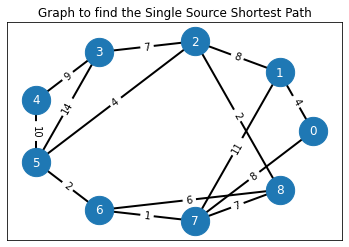

In [3]:
main()